In [2]:
access_token = '356738849-O1CxlznLWVfm660Im2NMaCfCsRaRer1xbD0NM029'
access_token_secret = 'i5VTC7Am54Xp1iAjymX1kTELkXBN3XURvtqddsH2VHbFk'
consumer_key = '6SUs8O33ZjtLjG1I46M8EnTK5'
consumer_secret = '1RJ8yLln4oP8t0opusbSfnJUpf0BFaRh7o4mxiC3iJM1EYprzl'

In [ ]:
! pip install tweepy

In [3]:
import tweepy
import numpy as np
import pandas as pd
import json

In [4]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [5]:
df = pd.DataFrame(columns = ['Tweets', 'User', 'User_statuses_count', 
                             'user_followers', 'User_location', 'User_verified',
                             'fav_count', 'rt_count', 'tweet_date'])

In [6]:
def stream(data, file_name):
    i = 0
    for tweet in tweepy.Cursor(api.search, q=data, count=100, lang='en').items():
        print(i, end='\r')
        print(tweet.text)
        df.loc[i, 'Tweets'] = tweet.text
        df.loc[i, 'User'] = tweet.user.name
        df.loc[i, 'User_statuses_count'] = tweet.user.statuses_count
        df.loc[i, 'user_followers'] = tweet.user.followers_count
        df.loc[i, 'User_location'] = tweet.user.location
        df.loc[i, 'User_verified'] = tweet.user.verified
        df.loc[i, 'fav_count'] = tweet.favorite_count
        df.loc[i, 'rt_count'] = tweet.retweet_count
        df.loc[i, 'tweet_date'] = tweet.created_at
        df.to_excel('{}.xlsx'.format(file_name))
        i+=1
        if i == 100:
            break
        else:
            pass

In [19]:
stream(data = ['Fractal'], file_name = 'my_tweets')

RT @EmilyWergifosse: New drop coming soon on #hicetnunc2000 ✨
I always try to go a little further, step by step.
Here are some pictures of…
okay, @figmadesign can u make sure they understand that #metoo works like those mirrors in the scary joker films wi… https://t.co/zuxJZ4p0uL
RT @FreedomIsrael_: 🇦🇺 This is DISGUSTING.
No parents allowed.
Just send 24,000 kids to get jabbed.

Tell them that getting jabbed is just…
@0xPolygon @hermez_network Congratulations @0xPolygon and @hermez_network on the first blockchain merger. This is a… https://t.co/dvVwtICdEw
RT @inmortalcrypto: 10k vs 30k Fractal / Generational bottoms.

#Bitcoin https://t.co/HkN2dowNYn
RT @fractalprtcl: -- Testnet Launch Pt. 6 🚀---

Co-Founder &amp; CTO of Gnosis: @StefanDGeorge interviewed by CTO/CPO of Fractal @juliosantos -…
💎 Full Fractal Blue Wild Kong Oil 

#Art #Paris #MadeinFrance https://t.co/h9e6k3VPXB
RT @EmilyWergifosse: New drop coming soon on #hicetnunc2000 ✨
I always try to go a little further, step by ste

RT @fractalprtcl: -- Testnet Launch Pt. 4 🚀--

"Don't pay for the internet with your personal data!"

Fractal´s Blockchain Lead Shelby Dool…
RT @fractalprtcl: -- Testnet Launch Pt. 4 🚀--

"Don't pay for the internet with your personal data!"

Fractal´s Blockchain Lead Shelby Dool…
RT @jc_hodler: 🚨 $XRP Fractal Update🚨

We are currently at 3rd circle as indicated with the yellow finger. Top image gives u bigger picture…
RT @fractalprtcl: -- Testnet Launch Pt. 3 🎉--

What are benefits for the parties involved in the advertising industry? 
This question &amp; man…
RT @jc_hodler: 🚨 $XRP Fractal Update🚨

We are currently at 3rd circle as indicated with the yellow finger. Top image gives u bigger picture…
RT @fractalprtcl: -- Testnet Launch Pt. 2 🎉--
Júlio Santos introduces the strategy of the Protocol. Embracing full transparency, he gives d…
RT @Koolaid_crypto: $VET update
Looking more like a micro pullback. Currently looking at this fractal. This would be the road to my $0.19 l…
RT @Stran

In [17]:
df.shape

(100, 10)

In [18]:
df.head()

,Tweets,User,User_statuses_count,user_followers,User_location,User_verified,fav_count,rt_count,tweet_date,Sentiment
0,RT @inmortalcrypto: 10k vs 30k Fractal / Gener...,Modern Hippie,1532,62,,False,0,139,2021-08-17 11:07:43,Neutral
1,RT @fractalprtcl: -- Testnet Launch Pt. 6 🚀---...,Tetiana,741,36,,False,0,1,2021-08-17 11:06:54,Positive
2,💎 Full Fractal Blue Wild Kong Oil \n\n#Art #Pa...,Richard Orlinski,3376,29134,"Paris, France",True,2,0,2021-08-17 11:02:45,Positive
3,RT @EmilyWergifosse: New drop coming soon on #...,NFT šëårçh ĒŃGÏÑĘ,91029,4056,Norway,False,0,1,2021-08-17 11:01:24,Negative
4,-- Testnet Launch Pt. 6 🚀---\n\nCo-Founder &am...,Fractal,495,28550,,False,4,1,2021-08-17 11:00:58,Positive


## Collect streaming data and perform basic sentiment analysis

In [ ]:
# ! pip install textblob

In [ ]:
# ! pip install wordcloud

In [ ]:
# ! pip install chart_studio

In [10]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
import re

In [11]:
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity ==0:
        return 'Neutral'
    else:
        return 'Negative'

In [12]:
df['Sentiment'] = df['Tweets'].apply(lambda x: analyze_sentiment(x))

In [13]:
df.head()

,Tweets,User,User_statuses_count,user_followers,User_location,User_verified,fav_count,rt_count,tweet_date,Sentiment
0,RT @salman3126: I'm so eagerly waiting to watc...,Salman (MD Ali Shaikh),73740,12295,"Mumbai, India",False,0,45,2021-08-17 11:03:34,Neutral
1,@positivewity @abhi1thakur @amazonIN @Flipkart...,Misal 🇮🇳,59798,810,"Ranchi | Bangalore, India 🇮🇳",False,0,0,2021-08-17 11:03:28,Positive
2,@motorolaindia @Flipkart Price is very high,Vannam the gamer,75,16,"Hyderabad, India",False,0,0,2021-08-17 11:03:24,Positive
3,"RT @motorolaindia: Yes, cutting edge technolog...",Abhay Yadav,3428,63,UTTAR PRADESH 🇮🇳,False,0,3,2021-08-17 11:03:06,Negative
4,@motorolaindia @Flipkart That's really appreci...,Dinesh Kapoor,87485,4171,"Gurgaon, India",False,0,0,2021-08-17 11:02:58,Positive


In [ ]:
df.to_csv('./clean_tweet.csv',index=False)

In [14]:
import seaborn as sns

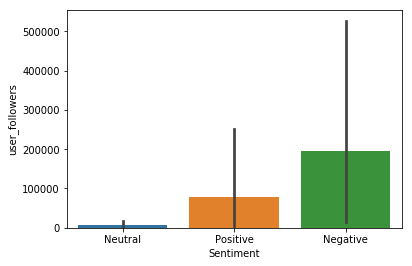

In [15]:
ax = sns.barplot(x="Sentiment", y="user_followers", data= df)